In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Beer Sales Dataset as pandas dataframe
dataset=pd.read_csv('data1.csv')

In [3]:
# Column renaming
dataset.rename(columns={'wqi':'water_quality_index'},inplace=True)
dataset.rename(columns={'dates':'DATE'},inplace=True)
dataset.head(5)

,DATE,water_quality_index
0,4/29/1986,62.0
1,5/19/1986,64.0
2,6/18/1986,67.0
3,7/24/1986,68.0
4,8/15/1986,68.0


In [4]:
# 'DATE' column is converted from 'object' data type to 'datetime' 
dataset['DATE'] = pd.to_datetime(dataset['DATE'])
# Feature Engineering is applied to extract the Months and Years from the 'DATE' column
dataset['Year'] = dataset['DATE'].apply(lambda date:date.year)
dataset['Month'] = dataset['DATE'].apply(lambda date:date.month)
dataset.head(2)

,DATE,water_quality_index,Year,Month
0,1986-04-29,62.0,1986,4
1,1986-05-19,64.0,1986,5


In [5]:
# 'DATE' column is set as dataset index
dataset=dataset.set_index(['DATE'])
dataset.head(2)

,water_quality_index,Year,Month
DATE,,,
1986-04-29,62.0,1986,4
1986-05-19,64.0,1986,5


In [6]:
# Mapping to rename the entries of the 'Month' column
num_to_name={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',
                                  6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dataset['Month'] = dataset['Month'].map(num_to_name)
dataset.head(2)

,water_quality_index,Year,Month
DATE,,,
1986-04-29,62.0,1986,Apr
1986-05-19,64.0,1986,May


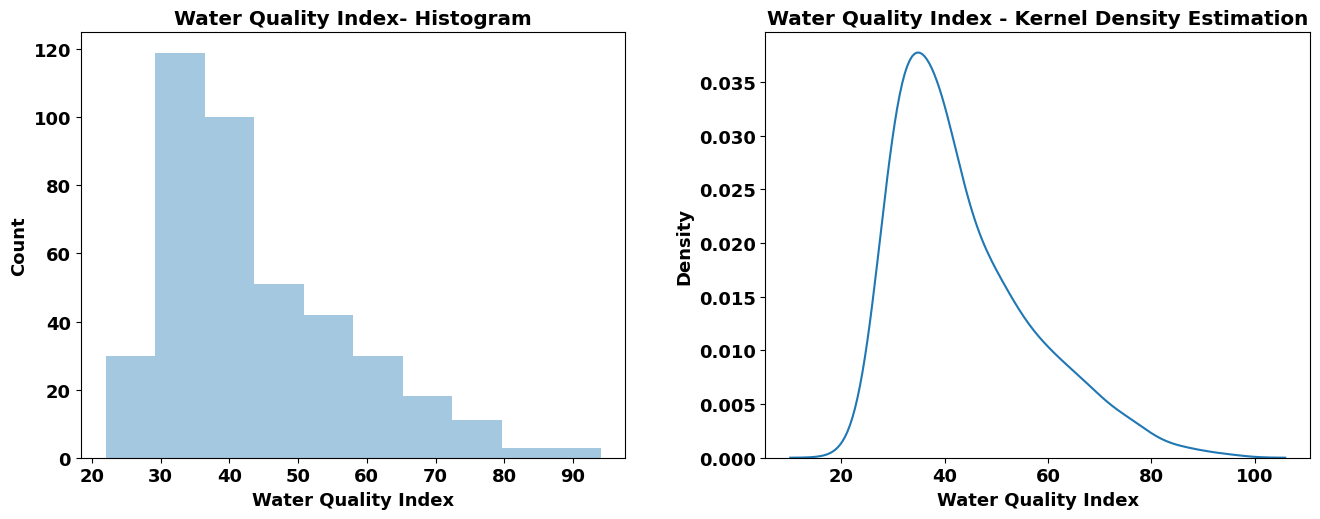

In [9]:
# Sales histogram and kernel density estimation plots
fig,axs=plt.subplots(1,2,figsize=(14,6))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=12

sns.distplot(dataset['water_quality_index'],kde=False,bins=10,ax=axs[0])
axs[0].set_title('Water Quality Index- Histogram',fontweight='bold')
axs[0].set_xlabel('Water Quality Index',fontweight='bold')
axs[0].set_ylabel('Count',fontweight='bold')

sns.distplot(dataset['water_quality_index'],kde=True,hist=False,ax=axs[1])
axs[1].set_title('Water Quality Index - Kernel Density Estimation',fontweight='bold')
axs[1].set_xlabel('Water Quality Index',fontweight='bold')
axs[1].set_ylabel('Density',fontweight='bold')


for ax in axs.flat:
    
    ax.figure.tight_layout(pad=3);

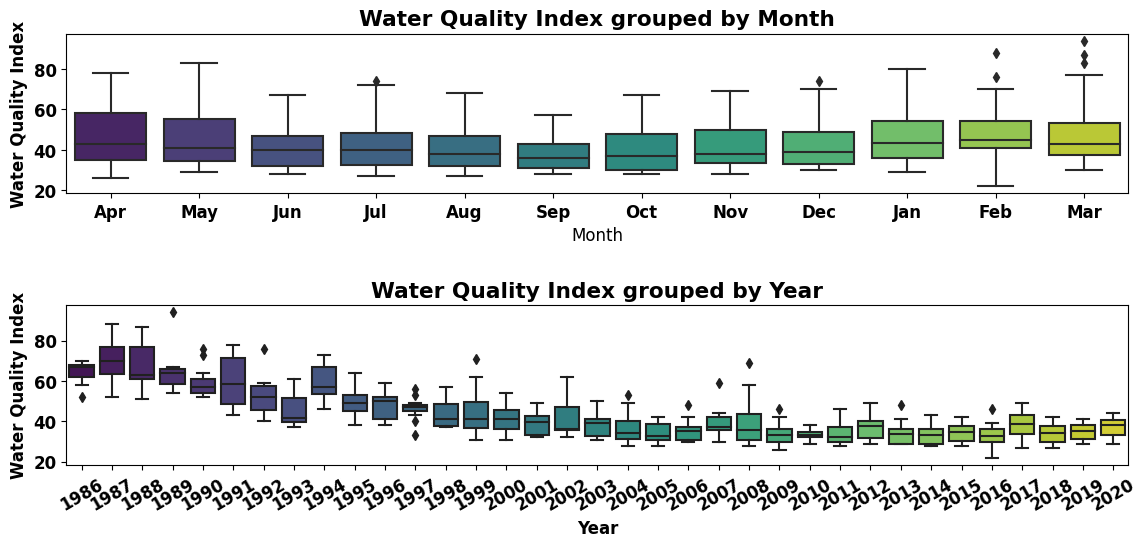

In [10]:
# Boxplots of Beer sales grouped by Month and Year. Based on the 'Months' boxplot, it can be observed that
# for both Beer and Alcohol sales, December has been the month with the highest sales (median value), whereas January the 
# month with the lowest sales (median value). In general, the total number of Beer and Alcohol sales increases over the years.
fig,axs=plt.subplots(2,1,figsize=(12,6))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13


sns.boxplot(x='Month',data=dataset,y='water_quality_index',palette='viridis',ax=axs[0])
axs[0].set_ylabel('Water Quality Index',fontweight='bold')
axs[0].set_title('Water Quality Index grouped by Month',fontweight='bold')
sns.boxplot(ax=axs[1],x='Year',data=dataset,y='water_quality_index',palette='viridis')
axs[1].set_xlabel('Year',fontweight='bold')
axs[1].set_ylabel('Water Quality Index',fontweight='bold')
axs[1].set_title('Water Quality Index grouped by Year',fontweight='bold')

plt.setp(axs[1].get_xticklabels(), rotation=30)
for ax in axs.flat:
   
    ax.figure.tight_layout(pad=2)

In [11]:
# Dropping the 'Year', 'Month' columns
data=dataset.drop(['Year','Month'],axis=1)
data.head()

,water_quality_index
DATE,
1986-04-29,62.0
1986-05-19,64.0
1986-06-18,67.0
1986-07-24,68.0
1986-08-15,68.0


Text(0.5, 1.0, 'Water Quality Index Time Series')

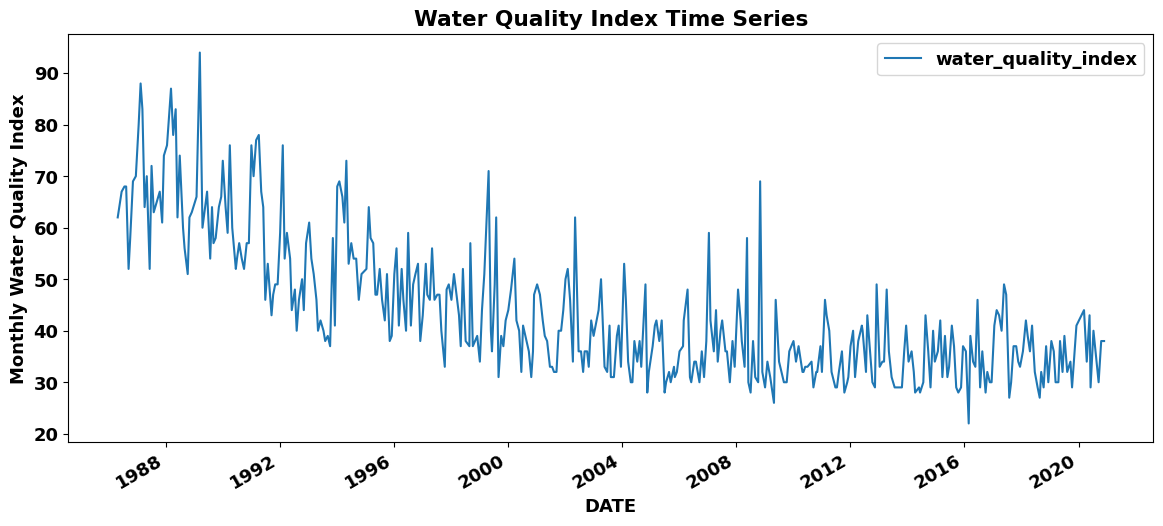

In [12]:
# Time Series Plot
data.plot(figsize=(14,6))
plt.xlabel('DATE',fontweight='bold')
plt.ylabel('Monthly Water Quality Index',fontweight='bold');
plt.title('Water Quality Index Time Series',fontweight='bold')

In [13]:
# Test size: 48 months
test_size = 48
# Dataset is split into training and test data
train = data.iloc[:len(dataset)- test_size]
test = data.iloc[-test_size:]

In [14]:
# Scaling the training and test data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
scaled_train = scaler.transform(data)
scaled_test = scaler.transform(test)

In [15]:
# Importing the keras library and the TimeseriesGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
# Training Batch length
length = 47
# No. of features
n_features=1
# Creating the time series generator
time_series_generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [17]:
# First batch of the time_series_generator- training and test values
InpSeq,TargetVal=time_series_generator[0]
# At the first batch, the generator takes the first 11 samples to predict the next sample
print(InpSeq,TargetVal)

[[[0.55555556]
  [0.58333333]
  [0.625     ]
  [0.63888889]
  [0.63888889]
  [0.41666667]
  [0.5       ]
  [0.65277778]
  [0.66666667]
  [0.80555556]
  [0.91666667]
  [0.84722222]
  [0.58333333]
  [0.66666667]
  [0.41666667]
  [0.69444444]
  [0.56944444]
  [0.625     ]
  [0.54166667]
  [0.72222222]
  [0.75      ]
  [0.90277778]
  [0.77777778]
  [0.84722222]
  [0.55555556]
  [0.72222222]
  [0.52777778]
  [0.47222222]
  [0.40277778]
  [0.55555556]
  [0.56944444]
  [0.61111111]
  [1.        ]
  [0.52777778]
  [0.625     ]
  [0.44444444]
  [0.58333333]
  [0.48611111]
  [0.5       ]
  [0.58333333]
  [0.61111111]
  [0.70833333]
  [0.58333333]
  [0.51388889]
  [0.75      ]
  [0.52777778]
  [0.41666667]]] [[0.44444444]]


In [18]:
# The first batch samples are the first 11 values of the time series
scaled_train[:47]

array([[0.55555556],
       [0.58333333],
       [0.625     ],
       [0.63888889],
       [0.63888889],
       [0.41666667],
       [0.5       ],
       [0.65277778],
       [0.66666667],
       [0.80555556],
       [0.91666667],
       [0.84722222],
       [0.58333333],
       [0.66666667],
       [0.41666667],
       [0.69444444],
       [0.56944444],
       [0.625     ],
       [0.54166667],
       [0.72222222],
       [0.75      ],
       [0.90277778],
       [0.77777778],
       [0.84722222],
       [0.55555556],
       [0.72222222],
       [0.52777778],
       [0.47222222],
       [0.40277778],
       [0.55555556],
       [0.56944444],
       [0.61111111],
       [1.        ],
       [0.52777778],
       [0.625     ],
       [0.44444444],
       [0.58333333],
       [0.48611111],
       [0.5       ],
       [0.58333333],
       [0.61111111],
       [0.70833333],
       [0.58333333],
       [0.51388889],
       [0.75      ],
       [0.52777778],
       [0.41666667]])

In [19]:
# The TargetVal of the time_series_generator first batch corresponds to the 48th [index 47] value of the scaled training data
print(TargetVal)
print(scaled_train[47])

[[0.44444444]]
[0.44444444]


**LSTM TRAINING**

In [20]:
# Importing the necessary libraries to create/construct the deep neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import initializers
import tensorflow as tf

In [21]:
# Use of random seed to get the same results at every run
tf.random.set_seed(0)
np.random.seed(0)

# Use of the he_uniform initializer to set the initial random weights of the model layers. 
initializer = tf.keras.initializers.he_uniform(seed=0)

# Initially, the network model is defined 
model = Sequential()

# Hidden layer neurons are chosen to be 11  which is equal to the defined length (number input samples per batch)
# Selected Activation function has been the rectified linear unit
model.add(LSTM(150, activation='relu', input_shape=(length, n_features),kernel_initializer=initializer))
# The output layer consists of 1 neuron with a 'linear' activation fuction 
model.add(Dense(1,activation='linear',kernel_initializer=initializer))
# The model is compiled using MSE as  loss function and Adam as optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')

# A validation generator is constructed in a similar way to the previous time_series_generator with the only difference being
# the use of scaled_test values for validation purposes
time_series_val_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)
# Début du chrono
import time
start_time_forcasting_lstm = time.time()
# The model is trained for 1000 epochs. At each epoch both training and validation losses can be observed
model.fit_generator(time_series_generator,epochs=1000,shuffle=False,
                    validation_data=time_series_val_generator) 
# Fin du chrono
end_time_forcasting_lstm = time.time()

Epoch 1/1000
360/360 [==============================] - 12s 30ms/step - loss: 0.0778 - val_loss: 7.2824e-05
Epoch 2/1000
360/360 [==============================] - 9s 26ms/step - loss: 0.0196 - val_loss: 5.1293e-04
Epoch 3/1000
360/360 [==============================] - 10s 29ms/step - loss: 0.0134 - val_loss: 0.0017
Epoch 4/1000
360/360 [==============================] - 10s 29ms/step - loss: 0.0137 - val_loss: 0.0027
Epoch 5/1000
360/360 [==============================] - 10s 27ms/step - loss: 0.0149 - val_loss: 0.0026
Epoch 6/1000
360/360 [==============================] - 10s 28ms/step - loss: 0.0152 - val_loss: 0.0027
Epoch 7/1000
360/360 [==============================] - 10s 28ms/step - loss: 0.0139 - val_loss: 0.0031
Epoch 8/1000
360/360 [==============================] - 10s 28ms/step - loss: 0.0148 - val_loss: 0.0033
Epoch 9/1000
360/360 [==============================] - 10s 27ms/step - loss: 0.0146 - val_loss: 0.0032
Epoch 10/1000
360/360 [==============================] - 

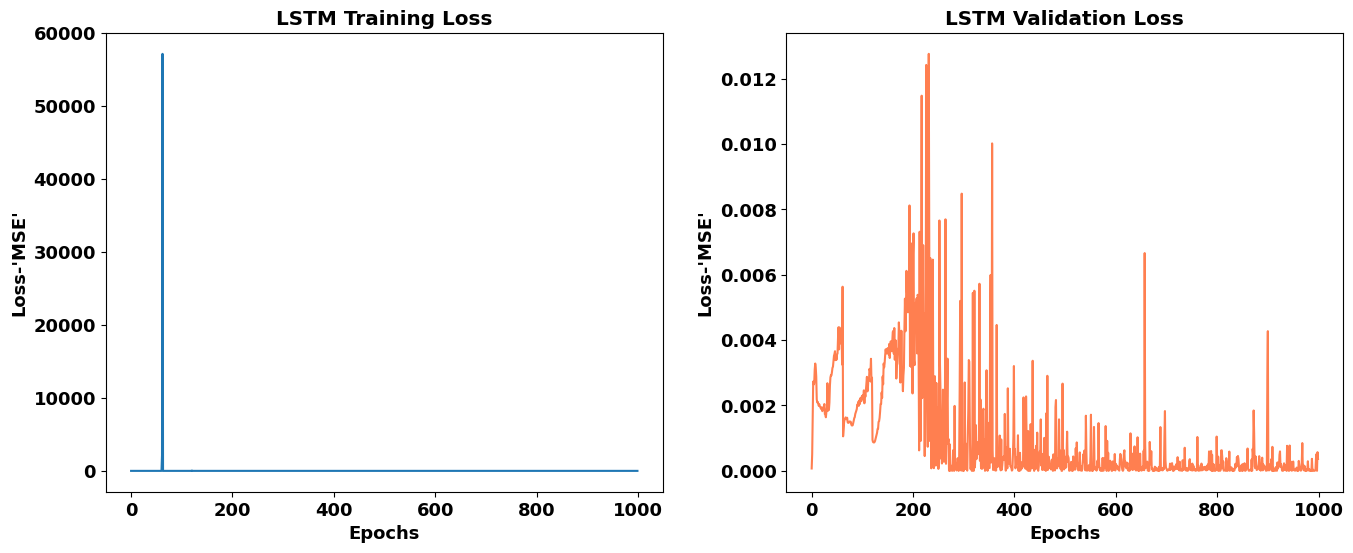

In [22]:
# Training and validation loss plots
fig,axs=plt.subplots(1,2,figsize=(14,6))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=12
train_loss = pd.DataFrame(model.history.history)
train_loss.loss.plot(ax=axs[0])
axs[0].set_title('LSTM Training Loss',fontweight='bold')
train_loss.val_loss.plot(ax=axs[1],color='coral')
axs[1].set_title('LSTM Validation Loss',fontweight='bold')
for ax in axs.flat:
    ax.set_xlabel('Epochs',fontweight='bold')
    ax.set_ylabel("Loss-'MSE'",fontweight='bold')

   
    ax.figure.tight_layout(pad=2)

**LSTM Predictions on the Training Set**

In [23]:
# Determining all LSTM outputs
training_outputs = []
batch = scaled_train[:length].reshape((1, length, n_features))

for i in range(len(scaled_train[length:])):
    train_out = model.predict(batch)[0]
    training_outputs.append(train_out) 
    batch = np.append(batch[:,1:,:],[[scaled_train[length:][i]]],axis=1)

1/1 [==============================] - 0s 33ms/step


In [24]:
#Inverse transforming the expected values
actual_train=scaled_train[length:]
actual_train=scaler.inverse_transform(actual_train)

In [25]:
# Inverse transforming the LSTM predictions on the training set
train_predictions=scaler.inverse_transform(training_outputs)

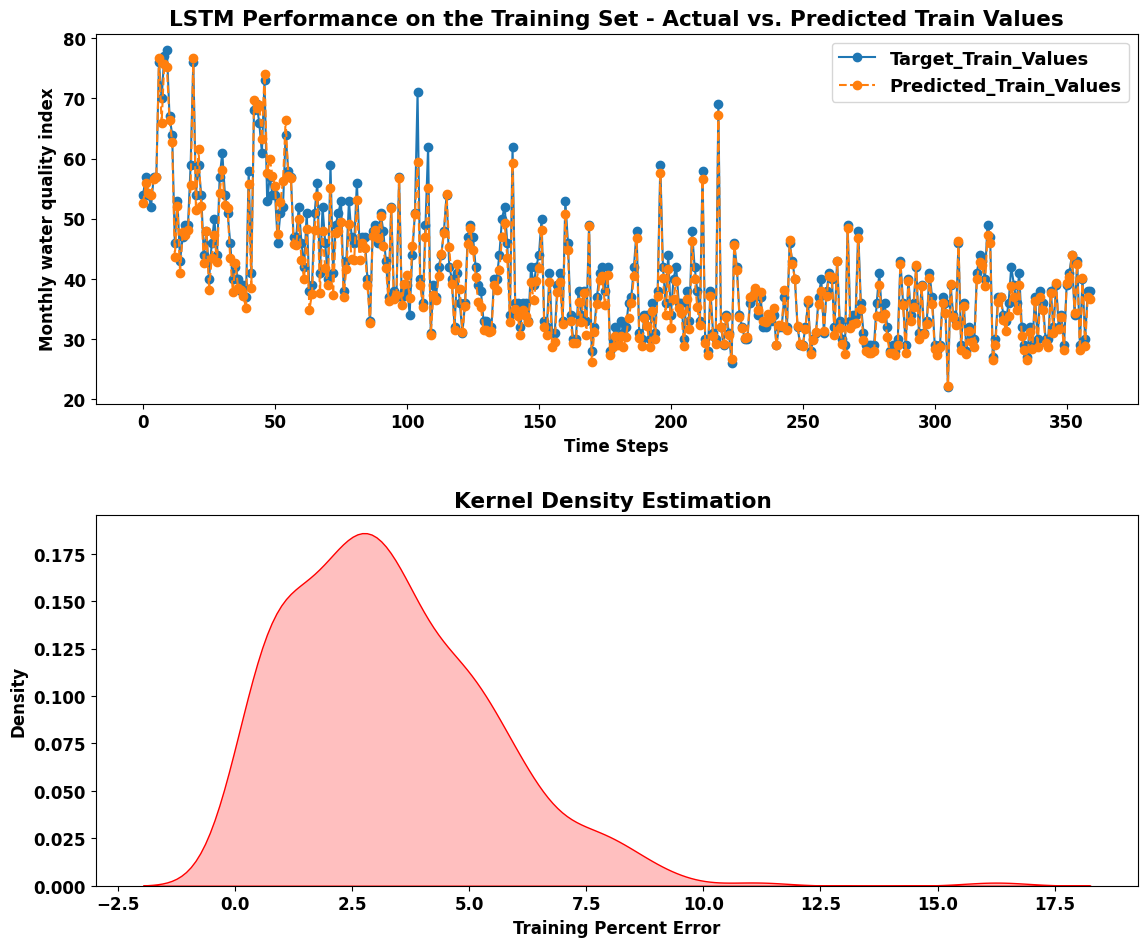

In [26]:
#'LSTM Performance on the training set - Actual vs. Predicted Values'
fig,axs=plt.subplots(2,1,figsize=(12,10))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13

axs[0].plot(actual_train,marker='o',linestyle='-',label='Target_Train_Values')

axs[0].plot(train_predictions,marker='o',linestyle='dashed',label='Predicted_Train_Values')
axs[0].set_title('LSTM Performance on the Training Set - Actual vs. Predicted Train Values',fontweight='bold')

axs[0].legend()
axs[0].set_xlabel('Time Steps',fontweight='bold')
axs[0].set_ylabel('Monthly water quality index',fontweight='bold');

# Training percent error distribution plot
train_err=abs((actual_train-train_predictions)/actual_train)*100
train_err=pd.DataFrame(train_err,columns=['Training Error'])

sns.kdeplot(train_err['Training Error'],shade=True,color='r',kernel='gau',ax=axs[1])
axs[1].set_xlabel('Training Percent Error',fontweight='bold')
axs[1].set_ylabel('Density',fontweight='bold');
axs[1].set_title('Kernel Density Estimation ',fontweight='bold')
for ax in axs.flat:
    ax.figure.tight_layout(pad=2);

In [27]:
# Summary statistics of training percent error
train_err.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Training Error,360.0,3.294182,2.178974,0.048344,1.659332,2.973193,4.688623,16.250176


**LSTM Predictions on the Test Set**

In [28]:
# Determining all LSTM outputs 
test_outputs = []
batch = scaled_train[-length:].reshape((1, length, n_features))

for i in range(len(test)):
    test_out = model.predict(batch)[0]
    test_outputs.append(test_out) 
    batch = np.append(batch[:,1:,:],[[test_out]],axis=1)

1/1 [==============================] - 0s 39ms/step


In [29]:
# Inverse transforming the LSTM predicitons
lstm_predictions = scaler.inverse_transform(test_outputs)

In [30]:
# A new test feature is created to comprise the LSTM test predictions
test['LSTM Predictions'] = lstm_predictions.round(2)

In [31]:
# test(Actual) and LSTM Predictions
test

,water_quality_index,LSTM Predictions
DATE,,
2016-09-28,28.0,38.82
2016-10-20,32.0,43.07
2016-11-21,30.0,39.70
2016-12-14,30.0,42.03
2017-01-18,41.0,41.98
2017-02-17,44.0,31.62
2017-03-20,43.0,36.37
2017-04-21,40.0,34.88
2017-05-22,49.0,39.38


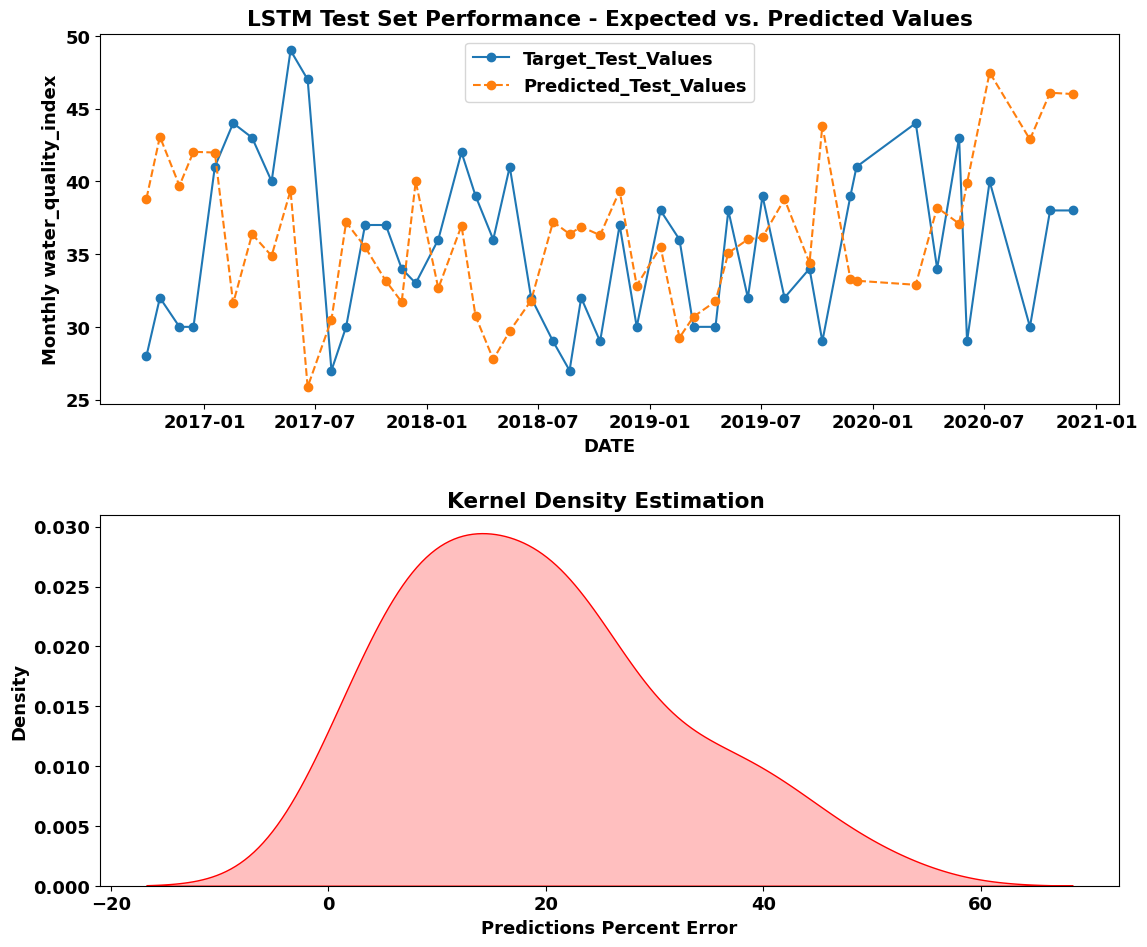

In [32]:
# Plot of the Test vs. Predicted values for a prediction horizon of 12 months 
fig,axs=plt.subplots(2,1,figsize=(12,10))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13

axs[0].plot(test['water_quality_index'],marker='o',linestyle='-',label='Target_Test_Values')

axs[0].plot(test['LSTM Predictions'],marker='o',linestyle='dashed',label='Predicted_Test_Values')
axs[0].set_title('LSTM Test Set Performance - Expected vs. Predicted Values',fontweight='bold')

axs[0].legend()
axs[0].set_xlabel('DATE',fontweight='bold')
axs[0].set_ylabel('Monthly water_quality_index',fontweight='bold');

# LSTM Predictions percent Error distribution plot
test_err=abs((test['water_quality_index']-test['LSTM Predictions'])/test['water_quality_index'])*100
test_err=pd.DataFrame(test_err,columns=['Test Set Error'])

sns.kdeplot(test_err['Test Set Error'],shade=True,color='r',kernel='gau',ax=axs[1])
axs[1].set_xlabel('Predictions Percent Error',fontweight='bold')
axs[1].set_ylabel('Density',fontweight='bold');
axs[1].set_title('Kernel Density Estimation ',fontweight='bold')
for ax in axs.flat:
    ax.figure.tight_layout(pad=2);

In [33]:
# Summary statistics of LSTM predictions percent error
test_err.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Test Set Error,48.0,19.213188,12.534106,0.59375,9.426389,18.711111,25.821646,51.137931


In [36]:
# Creating an index for the LSTM predictions on the Training Set
train_index=pd.date_range(start='1986-04-29',periods=360,freq='M')

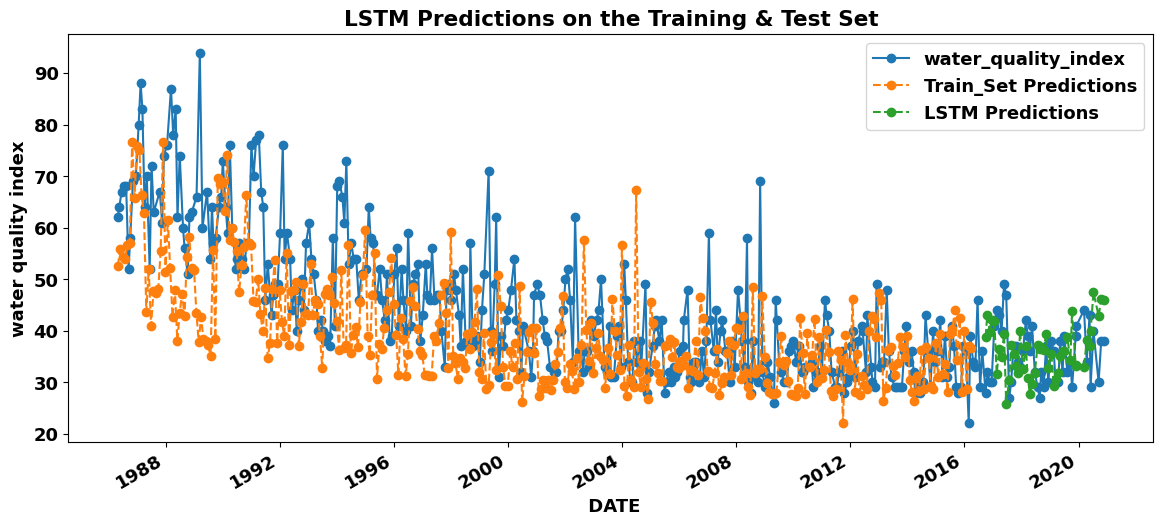

In [37]:
# Converting the train_predictions from np.ndarray to pandas dataframe
train_df=pd.DataFrame(data=train_predictions,index=train_index,columns=['Train_Set Predictions'])

# Plot comprising the original time series and the LSTM predictions on the Training and Test Set
ax=data.plot(figsize=(14,6),marker='o',linestyle='-')

train_df.plot(ax=ax,marker='o',linestyle='--',legend=True)
test['LSTM Predictions'].plot(ax=ax,legend=True,marker='o',linestyle='dashed')
plt.title('LSTM Predictions on the Training & Test Set',fontweight='bold')
plt.ylabel('water quality index',fontweight='bold')
plt.xlabel(' DATE',fontweight='bold');

**Monthly WQI future forecast using LSTM**

In [57]:
# A new scaler is being initialized
data_scaler=MinMaxScaler()
# fit_transform function applied to all dataset's entries
scaled_set=data_scaler.fit_transform(data)
# A new TimeseriesGenerator is created to include the new scaled values, (batch_size = 1 , length=12)
length=47
data_generator=TimeseriesGenerator(scaled_set,scaled_set,length=length,batch_size=1)

In [58]:
# Determining all LSTM predictions on the Training Set 
full_training_outputs = []
batch = scaled_set[:length].reshape((1, length, n_features))

for i in range(len(scaled_set[length:])):
    full_train_out = model.predict(batch)[0]
    full_training_outputs.append(full_train_out) 
    batch = np.append(batch[:,1:,:],[[scaled_set[length:][i]]],axis=1)

1/1 [==============================] - 0s 28ms/step


In [59]:
# Inverse transforming the actual training values
f_train=scaled_set[length:]
f_train=scaler.inverse_transform(f_train)

In [60]:
# Inverse transforming the LSTM predictions on the training set
f_train_predictions=scaler.inverse_transform(full_training_outputs)

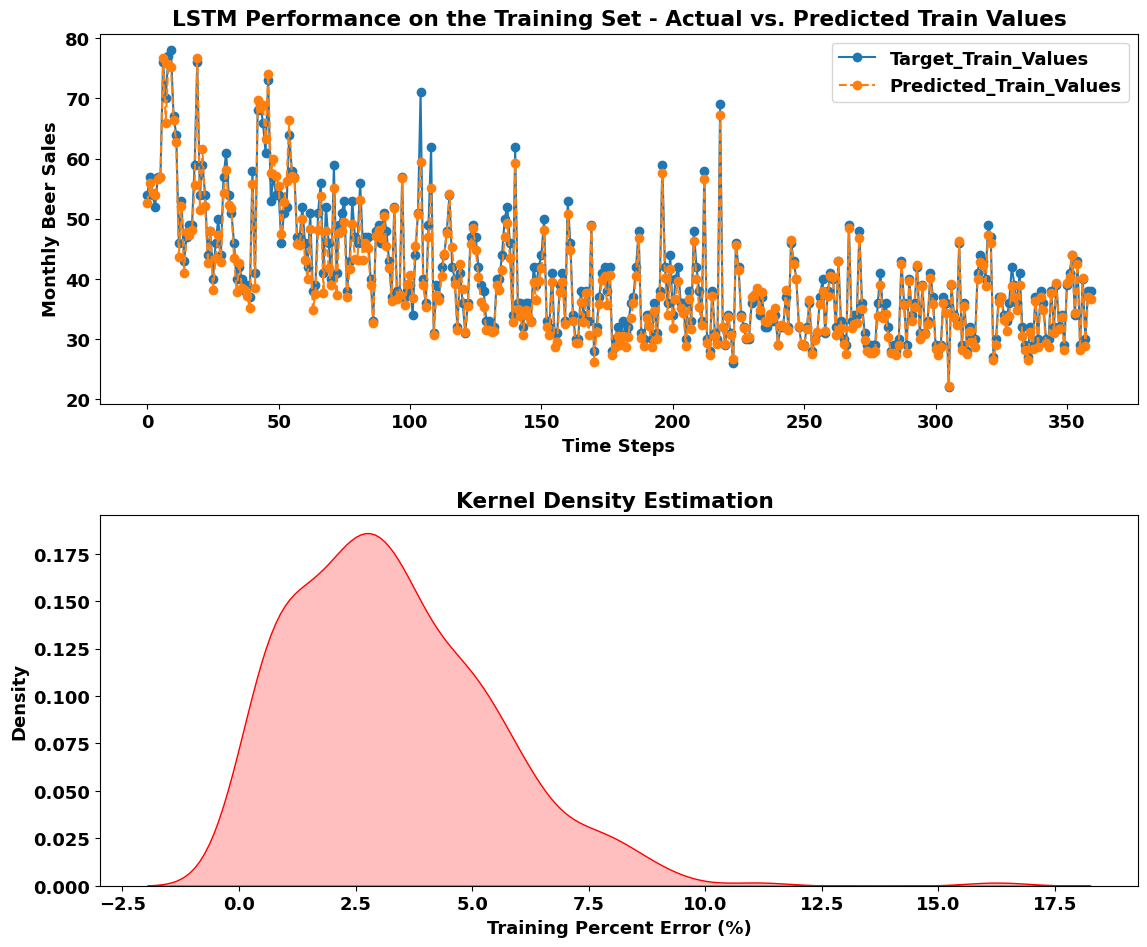

In [61]:
#'LSTM Training Performance - Actual vs. Predicted Training Values'
fig,axs=plt.subplots(2,1,figsize=(12,10))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13

axs[0].plot(f_train,marker='o',linestyle='-',label='Target_Train_Values')

axs[0].plot(f_train_predictions,marker='o',linestyle='dashed',label='Predicted_Train_Values')
axs[0].set_title('LSTM Performance on the Training Set - Actual vs. Predicted Train Values',fontweight='bold')

axs[0].legend()
axs[0].set_xlabel('Time Steps',fontweight='bold')
axs[0].set_ylabel('Monthly Beer Sales',fontweight='bold');

# Training Percent Error distribution plot
f_train_err=abs((f_train-f_train_predictions)/f_train)*100
f_train_err=pd.DataFrame(f_train_err,columns=['Training Error'])

sns.kdeplot(f_train_err['Training Error'],shade=True,color='r',kernel='gau',ax=axs[1])
axs[1].set_xlabel('Training Percent Error (%)',fontweight='bold')
axs[1].set_ylabel('Density',fontweight='bold');
axs[1].set_title('Kernel Density Estimation ',fontweight='bold')
for ax in axs.flat:
    ax.figure.tight_layout(pad=2);

In [62]:
# Creating an index for the LSTM predictions on the Training Set
f_train_index=pd.date_range(start='1986-04-29',periods=360,freq='M')

In [63]:
# Converting the LSTM predictions from np.ndarray to pandas dataframe
f_train_df=pd.DataFrame(data=f_train_predictions,index=f_train_index,columns=['Predicted_Train'])

In [64]:
# Obtaining the LSTM forecasted values 
lstm_outputs=[]
batch = scaled_set[-length:].reshape((1, length, n_features))

for i in range(length):
    lstm_out = model.predict(batch)[0]
    lstm_outputs.append(lstm_out) 
    batch = np.append(batch[:,1:,:],[[lstm_out]],axis=1)

1/1 [==============================] - 0s 31ms/step


In [65]:
# Inverse transforming the LSTM forecasts
lstm_outputs=data_scaler.inverse_transform(lstm_outputs)
lstm_outputs

array([[38.82122493],
       [43.06726694],
       [39.70401073],
       [42.02910185],
       [41.97751546],
       [31.61991966],
       [36.37441838],
       [34.87527275],
       [39.37653232],
       [25.86872172],
       [30.49538261],
       [37.18673074],
       [35.48994386],
       [33.15660763],
       [31.70595527],
       [39.98960698],
       [32.65406036],
       [36.94901085],
       [30.73883814],
       [27.75847852],
       [29.7134999 ],
       [31.80696726],
       [37.22322917],
       [36.37791169],
       [36.8776952 ],
       [36.3035512 ],
       [39.34898388],
       [32.84374297],
       [35.50258029],
       [29.259359  ],
       [30.70074111],
       [31.75103891],
       [35.08288217],
       [36.00743639],
       [36.1595552 ],
       [38.77604151],
       [34.39457369],
       [43.83330584],
       [33.27403045],
       [33.17426622],
       [32.89002395],
       [38.19770789],
       [37.0938834 ],
       [39.87541032],
       [47.48091054],
       [42

In [66]:
# Creating an index for the LSTM forecasts
lstm_forecast_index=pd.date_range(start='2021-01-01',periods=47,freq='M')

In [67]:
# Converting the lstm_outputs from np.ndarray to pandas dataframe
lstm_forecast_df=pd.DataFrame(data=lstm_outputs,index=lstm_forecast_index,columns=['LSTM Forecasts'])
lstm_forecast_df

,LSTM Forecasts
2021-01-31,38.821225
2021-02-28,43.067267
2021-03-31,39.704011
2021-04-30,42.029102
2021-05-31,41.977515
2021-06-30,31.619920
2021-07-31,36.374418
2021-08-31,34.875273
2021-09-30,39.376532
2021-10-31,25.868722


Text(0.5, 0, ' DATE')

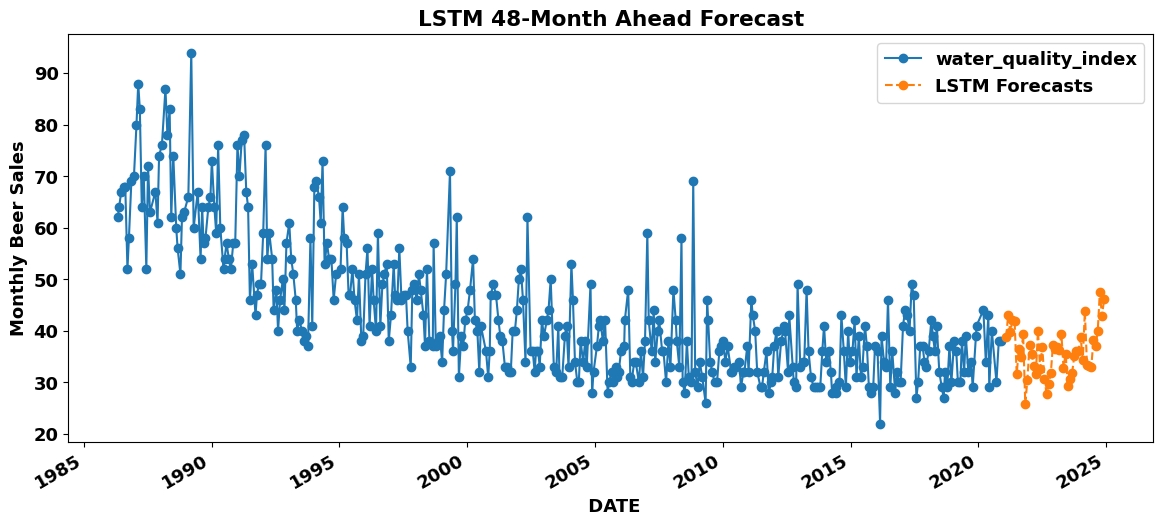

In [71]:
# Plot comprising the original time series,and the 12-month LSTM forecasts

ax=data.plot(figsize=(14,6),marker='o',linestyle='-')
lstm_forecast_df.plot(ax=ax,marker='o',linestyle='--')
plt.title('LSTM 48-Month Ahead Forecast',fontweight='bold')
plt.ylabel('Monthly Beer Sales',fontweight='bold')
plt.xlabel(' DATE',fontweight='bold')

In [70]:
model.save('forcasting_wqi_hong_kong_using_lstm.h5')